In [66]:
# import işlemleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Verisetinin yüklenmesi
path = "/content/drive/MyDrive/Datasets/HouseData.csv"
df = pd.read_csv(path)

In [3]:
# Veri setinde herhangi bir değişiklik yapmadan önce bir kopyasını oluşturmakta fayda var.
df_copy = df.copy()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Veri setinin incelenmesi**

In [5]:
df.head(11)

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,adalar,"7,000,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",17 Ocak 2022,Satılık,200 m2,21 Ve Üzeri,2,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,adalar,"3,250,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",27 Şubat 2022,Satılık,400 m2,21 Ve Üzeri,3,Kiracı Oturuyor,...,Genel Fiyat,12.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,adalar,"2,850,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",22 Şubat 2022,Satılık,250 m2,21 Ve Üzeri,2,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,adalar,"8,350,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",16 Aralık 2021,Satılık,360 m2,21 Ve Üzeri,2,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,adalar,"10,800,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",16 Aralık 2021,Satılık,180 m2,21 Ve Üzeri,2,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Veri seti 25155 satır ve 38 sütundan oluşuyor.
df.shape

(25155, 38)

In [7]:
df.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [8]:
# 'Unnamed:0' sütunu hiçbir şey ifade etmediği için datasetten silebiliriz.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,EligibilityForInvestment,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,Bilinmiyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,Yatırıma Uygun,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,Bilinmiyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,Bilinmiyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,Bilinmiyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district                  25155 non-null  object
 1   price                     25155 non-null  object
 2   address                   25155 non-null  object
 3   AdUpdateDate              25155 non-null  object
 4   Category                  25155 non-null  object
 5   GrossSquareMeters         25155 non-null  object
 6   BuildingAge               25155 non-null  object
 7   NumberFloorsofBuilding    25155 non-null  int64 
 8   UsingStatus               25155 non-null  object
 9   EligibilityForInvestment  21506 non-null  object
 10  BuildStatus               11231 non-null  object
 11  TitleStatus               9712 non-null   object
 12  ItemStatus                18332 non-null  object
 13  NumberOfBathrooms         25155 non-null  object
 14  NumberOfWCs           

Veri setindeki değişkenlerin type'larına baktığımızda tek int olan değişkenin **NumberFloorsofBuilding** değişkeni olduğunu gözlemliyoruz.
Fakat bu veri setinde değişkenlerin type'ları o kadar anlamsız ilişkilendirilmiş ki **price** değişkeni bile object olarak atanmış.
Bu yüzden ilk olarak type'larını istenilen şekilde ayarlamamız gerekiyor.

In [11]:
# Değişken type'larını ayarlamadan önce featuresleri inceleyip hedef değişkenimize etkisi olmayacak özellikleri veri setinden silerek gürültüyü azaltabiliriz.
df.isnull().sum()

,0
district,0
price,0
address,0
AdUpdateDate,0
Category,0
GrossSquareMeters,0
BuildingAge,0
NumberFloorsofBuilding,0
UsingStatus,0
EligibilityForInvestment,3649


**Hedef Değişkene Etkisi Olmayan Sütunların Silinmesi**

Veri setinde 37 adet sütun var ve bunların hepsi doğrudan hedef değişkenle ilgili değil, bu yüzden hedef değişkene etkisi olmayan sütunları silmek veri boyutunu azaltırken gürültüyü de önler.

**Hangi Sütunu Neden Siliyoruz?**

**address** -> Adres üzerinde ilçe (district) bilgisi zaten var ve bu hedef değişken için daha anlamlı.

**AdUpdateDate** -> İlanın güncellenme tarihi — zamana bağlı modellerde faydalı olabilir ama price ile doğrudan ilişkisi yok.

**AdCreationDate** -> İlanın oluşturulma tarihi de hedef değişken için bir anlam ifade etmiyor.

**IsItVideoNavigable?** -> İlanın video içermesi evin fiyatını etkilemeyeceği için bu sütun da anlamsız.

**Subscription** -> Abonelik veya aidat - bunun da doğrudan evin fiyatı üzerinde bir etkisi yok.

**PriceStatus** -> Birim ve Genel fiyat değerleri içeriyor, price değişkenine doğrudan etkisi yok.

**Swap** -> Takas olur mu ? , takasın olup olmaması evin kendi fiyatını değiştirmeyeceğinden bu veri setinden çıkartılabilir.

**EligibilityForInvestment** -> Yatırıma uygun mu ? , aslında evin fiyatına doğrudan etkisi var ama çok fazla 'bilinmiyor' değer içerdiği için bir anlam ifade etmiyor.

In [12]:
# Sütun silme işlemleri
df.drop(['address', 'AdUpdateDate', 'AdCreationDate', 'IsItVideoNavigable?', 'Subscription', 'PriceStatus', 'Swap', 'EligibilityForInvestment'], axis=1, inplace=True)

In [13]:
df.columns # Gereksiz olarak belirlediğimiz sütunlar silindi.

Index(['district', 'price', 'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'BuildStatus', 'TitleStatus',
       'ItemStatus', 'NumberOfBathrooms', 'NumberOfWCs', 'Type',
       'NetSquareMeters', 'NumberOfRooms', 'FloorLocation', 'HeatingType',
       'CreditEligibility', 'InsideTheSite', 'StructureType', 'MortgageStatus',
       'Balcony', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'BathroomSquareMeters',
       'BalconySquareMeters'],
      dtype='object')

**Eksik Değer Analizi**

Encoding işlemlerine geçmeden önce, eksik değerleri doldurmamız gerekiyor.

In [14]:
df.head()

,district,price,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,BuildStatus,TitleStatus,ItemStatus,...,StructureType,MortgageStatus,Balcony,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,BathroomSquareMeters,BalconySquareMeters
0,adalar,"3,100,000TL",Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,NaN,NaN,Eşyalı,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adalar,"1,600,000TL",Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,İkinci El,Kat Mülkiyeti,Eşyalı,...,Betonarme,Yok,Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,adalar,"18,500,000TL",Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,NaN,NaN,Boş,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adalar,"9,500,000TL",Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,İkinci El,NaN,NaN,...,Betonarme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adalar,"25,000,000TL",Satılık,840 m2,21 Ve Üzeri,4,Boş,İkinci El,NaN,NaN,...,Ahşap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

,0
district,0
price,0
Category,0
GrossSquareMeters,0
BuildingAge,0
NumberFloorsofBuilding,0
UsingStatus,0
BuildStatus,13924
TitleStatus,15443
ItemStatus,6823


In [16]:
# Boş değer içeren tüm hücreler mod yöntemi ile dolduruldu.
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i] = df[i].fillna(df[i].mode()[0])

In [17]:
df.isnull().sum()

,0
district,0
price,0
Category,0
GrossSquareMeters,0
BuildingAge,0
NumberFloorsofBuilding,0
UsingStatus,0
BuildStatus,0
TitleStatus,0
ItemStatus,0


In [18]:
# 'price' değişkeninden 'TL' ve '.' ibarelerinin kaldırılması
df['price'] = df['price'].str.replace('TL', '')
df['price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].str.replace(',', ' ')
df['price'] = df['price'].str.replace(' ', '')
df['price']

,price
0,3100000
1,1600000
2,18500000
3,9500000
4,25000000
...,...
25150,1850000
25151,1100000
25152,9000000
25153,13000000


In [19]:
# Öncelikle m² ve TL içeren değerleri sayıya dönüştürelim

# NetSquareMeters
df['NetSquareMeters'] = df['NetSquareMeters'].str.replace('m2', '')

# GrossSquareMeters
df['GrossSquareMeters'] = df['GrossSquareMeters'].str.replace('m2', '')

# HallSquareMeters
df['HallSquareMeters'] = df['HallSquareMeters'].str.replace('m2', '')

# WCSquareMeters
df['WCSquareMeters'] = df['WCSquareMeters'].str.replace('m2', '')

# BathroomSquareMeters
df['BathroomSquareMeters'] = df['BathroomSquareMeters'].str.replace('m2', '')

# BalconySquareMeters
df['BalconySquareMeters'] = df['BalconySquareMeters'].str.replace('m2', '')

# RentalIncome
df['RentalIncome'] = df['RentalIncome'].str.replace('TL', '')

In [20]:
# sayısal olması gerekirken object olan değişkenlerin typelarının düzenlenmesi
df['NetSquareMeters'] = df['NetSquareMeters'].astype(float)
df['GrossSquareMeters'] = df['GrossSquareMeters'].astype(float)
df['HallSquareMeters'] = df['HallSquareMeters'].astype(float)
df['WCSquareMeters'] = df['WCSquareMeters'].astype(float)
df['BathroomSquareMeters'] = df['BathroomSquareMeters'].astype(float)
df['BalconySquareMeters'] = df['BalconySquareMeters'].astype(float)

In [21]:
# Hücre tekrardan çalıştırıldığı için hata mesajı döndürdü.
df['RentalIncome'] = df['RentalIncome'].str.replace('.', '')
df['RentalIncome'] = df['RentalIncome'].str.replace(',', ' ')
df['RentalIncome'] = df['RentalIncome'].str.replace(' ', '')
df['RentalIncome'].unique()

array(['3000', '12000', '4500', '3500', '2500', '2000', '5000', '2600',
       '2300', '14000', '20000', '15000', '4000', '2700', '0', '3750',
       '2250', '1700', '1500', '1150', '7500', '250', '6500', '5500',
       '9000', '6000', '2800', '2200', '1800', '115000', '10000', '7000',
       '2850', '1750', '4250', '1900', '40000', '1250', '800', '2400',
       '8000', '35000', '4750', '11000', '60000', '34000', '6600', '3800',
       '5', '55000', '70000', '24000', '2750', '1350', '25000', '1100',
       '3250', '1200', '130000', '9500', '1400', '8500', '1', '25',
       '1000', '50000', '5000000', '3200', '13000', '1600', '23000',
       '5250', '5500000', '30000', '18000', '16000', '160000', '15500',
       '4800', '17500', '12500', '17000', '26000', '11500', '21000', '20',
       '8000000', '125003', '300000', '250000', '12500000', '2100',
       '1300', '75000', '2640', '19500', '6300', '110000', '45000',
       '605EUR', '690EUR', '3600', '150000', '700', '4200', '5000USD',
    

In [22]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [23]:
df['price'].dtype

dtype('float64')

In [24]:
df['RentalIncome'] = df['RentalIncome'].str.extract(r'([\d.,]+)') # Bu kod 'EUR', 'USD' gibi değerleri verisetinden siler

In [25]:
df['RentalIncome'].unique()

array(['3000', '12000', '4500', '3500', '2500', '2000', '5000', '2600',
       '2300', '14000', '20000', '15000', '4000', '2700', '0', '3750',
       '2250', '1700', '1500', '1150', '7500', '250', '6500', '5500',
       '9000', '6000', '2800', '2200', '1800', '115000', '10000', '7000',
       '2850', '1750', '4250', '1900', '40000', '1250', '800', '2400',
       '8000', '35000', '4750', '11000', '60000', '34000', '6600', '3800',
       '5', '55000', '70000', '24000', '2750', '1350', '25000', '1100',
       '3250', '1200', '130000', '9500', '1400', '8500', '1', '25',
       '1000', '50000', '5000000', '3200', '13000', '1600', '23000',
       '5250', '5500000', '30000', '18000', '16000', '160000', '15500',
       '4800', '17500', '12500', '17000', '26000', '11500', '21000', '20',
       '8000000', '125003', '300000', '250000', '12500000', '2100',
       '1300', '75000', '2640', '19500', '6300', '110000', '45000', '605',
       '690', '3600', '150000', '700', '4200', '3300', '6500000',
  

In [26]:
df['RentalIncome'] = pd.to_numeric(df['RentalIncome'])

In [27]:
df['RentalIncome'].unique()

array([    3000,    12000,     4500,     3500,     2500,     2000,
           5000,     2600,     2300,    14000,    20000,    15000,
           4000,     2700,        0,     3750,     2250,     1700,
           1500,     1150,     7500,      250,     6500,     5500,
           9000,     6000,     2800,     2200,     1800,   115000,
          10000,     7000,     2850,     1750,     4250,     1900,
          40000,     1250,      800,     2400,     8000,    35000,
           4750,    11000,    60000,    34000,     6600,     3800,
              5,    55000,    70000,    24000,     2750,     1350,
          25000,     1100,     3250,     1200,   130000,     9500,
           1400,     8500,        1,       25,     1000,    50000,
        5000000,     3200,    13000,     1600,    23000,     5250,
        5500000,    30000,    18000,    16000,   160000,    15500,
           4800,    17500,    12500,    17000,    26000,    11500,
          21000,       20,  8000000,   125003,   300000,   250

In [28]:
df['RentalIncome'].dtype

dtype('int64')

In [29]:
df.isnull().sum()

,0
district,0
price,1333
Category,0
GrossSquareMeters,0
BuildingAge,0
NumberFloorsofBuilding,0
UsingStatus,0
BuildStatus,0
TitleStatus,0
ItemStatus,0


In [30]:
# price değişkenimizdeki boş değerlerden kurtulduk
df['price'] = df['price'].fillna(df['price'].mean())
df['price'].isnull().sum()
df['price']

,price
0,3100000.0
1,1600000.0
2,18500000.0
3,9500000.0
4,25000000.0
...,...
25150,1850000.0
25151,1100000.0
25152,9000000.0
25153,13000000.0


**Aykırı Değer Analizi**

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print('Sayısal Sütunlar :', numeric_columns)

Sayısal Sütunlar : Index(['price', 'GrossSquareMeters', 'NumberFloorsofBuilding',
       'NetSquareMeters', 'RentalIncome', 'HallSquareMeters', 'WCSquareMeters',
       'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')


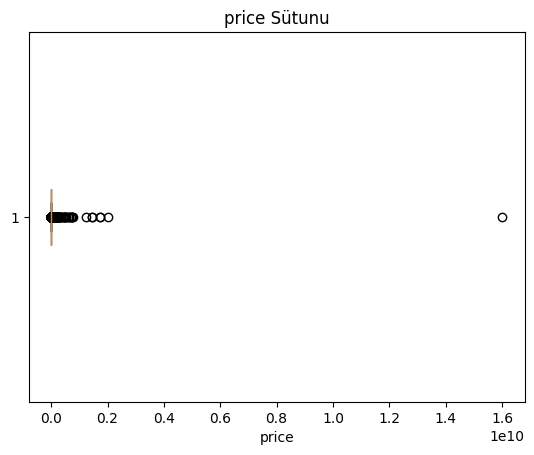

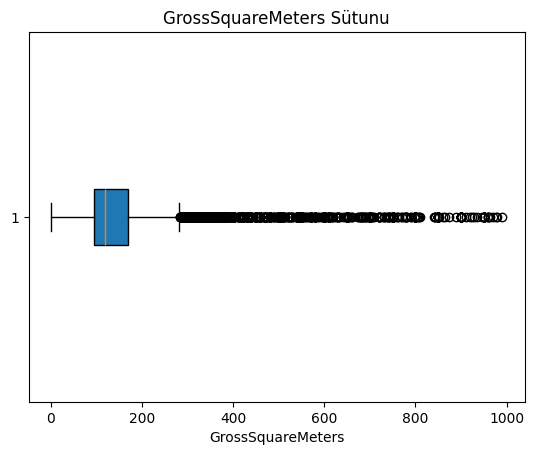

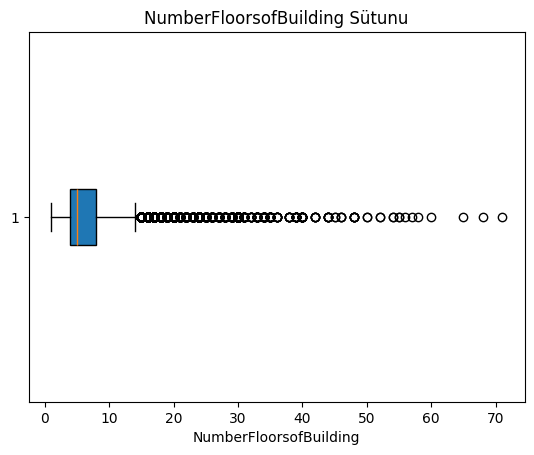

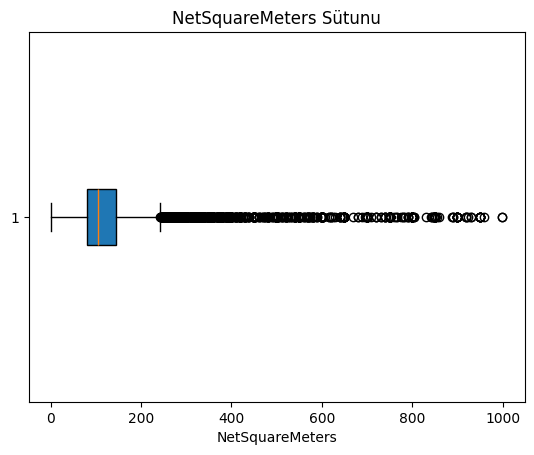

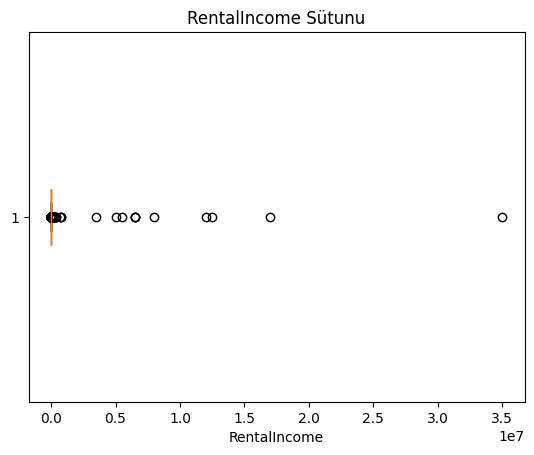

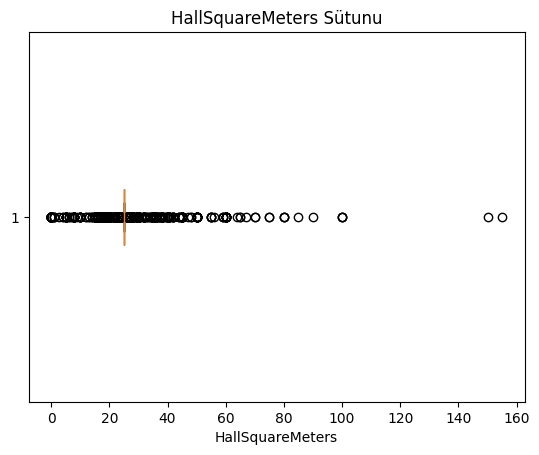

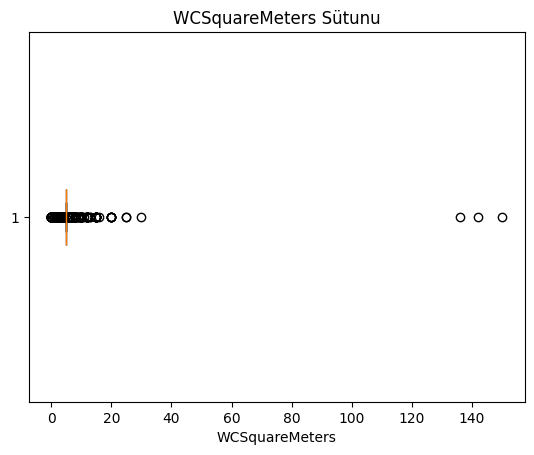

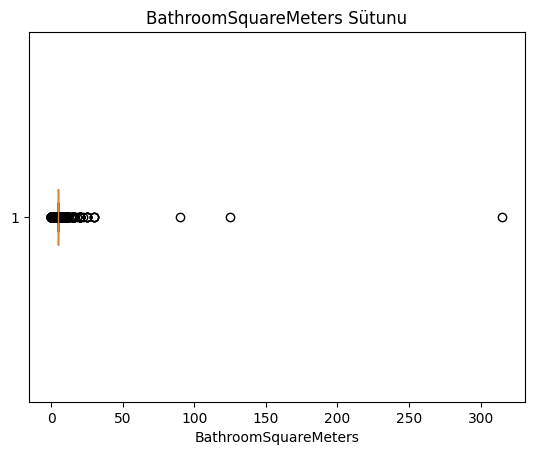

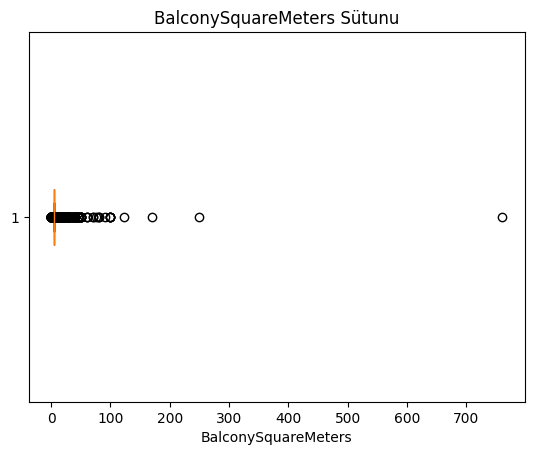

In [32]:
# Aykırı değerlerin görselleştirilmesi
for col in numeric_columns:
  plt.boxplot(df[col], vert=False, patch_artist=True)
  plt.title(f'{col} Sütunu')
  plt.xlabel(col)
  plt.show()

**Aykırı değer analizi yapmalı mıyım?**

Görüldüğü üzere her sayısal sütunumuz için aykırı değerler mevcut, normal şartlarda bu tarz durumlarda aykırı değerlerin bastırılması(sınıra çekilmesi) gerekir fakat hedef değişkenimiz fiyat olduğu için böyle bir durumda fiyata ve fiyata etki derecesi yüksek olan sütunlara müdahale etmek doğru olmayacaktır.

# ENCODE İŞLEMLERİ

In [33]:
df.select_dtypes(include=['object']).columns

Index(['district', 'Category', 'BuildingAge', 'UsingStatus', 'BuildStatus',
       'TitleStatus', 'ItemStatus', 'NumberOfBathrooms', 'NumberOfWCs', 'Type',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Balcony',
       'NumberOfBalconies', 'BalconyType'],
      dtype='object')

In [34]:
df.head()

,district,price,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,BuildStatus,TitleStatus,ItemStatus,...,StructureType,MortgageStatus,Balcony,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,BathroomSquareMeters,BalconySquareMeters
0,adalar,3100000.0,Satılık,160.0,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,İkinci El,Kat Mülkiyeti,Eşyalı,...,Betonarme,Yok,Var,3000,1,Açık Balkon,25.0,5.0,5.0,5.0
1,adalar,1600000.0,Satılık,120.0,5-10,3,Mülk Sahibi Oturuyor,İkinci El,Kat Mülkiyeti,Eşyalı,...,Betonarme,Yok,Var,3000,1,Açık Balkon,25.0,5.0,5.0,5.0
2,adalar,18500000.0,Satılık,350.0,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,İkinci El,Kat Mülkiyeti,Boş,...,Betonarme,Yok,Var,3000,1,Açık Balkon,25.0,5.0,5.0,5.0
3,adalar,9500000.0,Satılık,550.0,11-15,3,Mülk Sahibi Oturuyor,İkinci El,Kat Mülkiyeti,Boş,...,Betonarme,Yok,Var,3000,1,Açık Balkon,25.0,5.0,5.0,5.0
4,adalar,25000000.0,Satılık,840.0,21 Ve Üzeri,4,Boş,İkinci El,Kat Mülkiyeti,Boş,...,Ahşap,Yok,Var,3000,1,Açık Balkon,25.0,5.0,5.0,5.0


In [35]:
df['BuildingAge_numeric'] = df['BuildingAge_numeric'].astype(int)
df['NumberOfBathrooms_numeric'] = pd.to_numeric(df['NumberOfBathrooms_numeric'])
df['NumberOfWCs_numeric'] = pd.to_numeric(df['NumberOfWCs_numeric'])
df['NumberOfBalconies_numeric'] = pd.to_numeric(df['NumberOfBalconies_numeric'])

KeyError: 'BuildingAge_numeric'

In [36]:
df['BuildingAge'].unique()

array(['21 Ve Üzeri', '5-10', '11-15', '2', '0 (Yeni)', '3', '4', '16-20',
       '1', '20 Ve Üzeri'], dtype=object)

In [37]:
# BuildingAge değişkenini sayısala döndürme işlemi
building_age_map = {
    '0 (Yeni)': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5-10': 7.5,
    '11-15': 13,
    '16-20': 18,
    '20 Ve Üzeri': 21,
    '21 Ve Üzeri': 21
}

df['BuildingAge_numeric'] = df['BuildingAge'].map(building_age_map)

- Burada direkt olarak sayısal içerenler sayısal olarak işaretlendi (0=0, 1=1)
- Aralık olanlar ortalama olarak işaretlendi (5-10 = 7.5)
- 20 ve üzeri , 21 ve üzeri ise 21 olarak işaretlendi

In [38]:
df['BuildingAge_numeric'].dtype

dtype('float64')

In [39]:
# BuildingAge değişkeni artık silinebilir
df.drop('BuildingAge', axis=1, inplace=True)

In [40]:
# NumberOfBathrooms
df['NumberOfBathrooms'].unique()

array(['2', '1', '3', '4', '5', 'Yok', '6+'], dtype=object)

In [41]:
NumberOfBathrooms_map = {
    '2': 2,
    '1': 1,
    '3': 3,
    '4': 4,
    '5': 5,
    'Yok':0,
    '6+':6
}
df['NumberOfBathrooms_numeric'] = df['NumberOfBathrooms'].map(NumberOfBathrooms_map)

In [42]:
df['NumberOfBathrooms_numeric'].unique()

array([2, 1, 3, 4, 5, 0, 6])

In [43]:
df.drop('NumberOfBathrooms', axis=1, inplace=True)

In [44]:
# NumberOfWCs
df['NumberOfWCs'].unique()

array(['1', '2', '4', '3', 'Yok', '5', '6+'], dtype=object)

In [45]:
NumberOfWCs_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'Yok':0,
    '5':5,
    '6+':6
}
df['NumberOfWCs_numeric'] = df['NumberOfWCs'].map(NumberOfWCs_map)

In [46]:
df['NumberOfWCs_numeric'].unique()

array([1, 2, 4, 3, 0, 5, 6])

In [47]:
df.drop('NumberOfWCs', axis=1, inplace=True)

In [48]:
# NumberOfBalconies
df['NumberOfBalconies'].unique()

array(['1', '4 +', '3', '2'], dtype=object)

In [49]:
NumberOfBalconies_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4 +': 4
}
df['NumberOfBalconies_numeric'] = df['NumberOfBalconies'].map(NumberOfWCs_map)

In [50]:
df['NumberOfBalconies_numeric'].unique()

array([ 1., nan,  3.,  2.])

In [51]:
df['NumberOfBalconies_numeric'].isnull().sum()

np.int64(81)

In [52]:
df['NumberOfBalconies_numeric'] = df['NumberOfBalconies_numeric'].fillna(df['NumberOfBalconies_numeric'].mode()[0])

In [53]:
df.drop('NumberOfBalconies', axis=1, inplace=True)

In [54]:
# Label Encoding
df.select_dtypes(include=['object']).columns,
label_cols = ['CreditEligibility', 'InsideTheSite', 'MortgageStatus', 'Balcony', 'district']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# One-Hot Encoding
one_hot_cols = ['Category', 'UsingStatus', 'BuildStatus', 'TitleStatus',
                'ItemStatus', 'Type', 'HeatingType', 'StructureType', 'BalconyType',]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


**Modelin eğitilmesi ve decisiontrees uygulanması**

In [55]:
target = 'price'
X = df.drop(columns=[target])  # Bağımsız değişkenler
y = df[target] # Hedef değişken

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin oluşturulması
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. Tahmin ve metrikler
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 155024453899253376.00
R² Score: -163.03


değerler oldukça kötü durumda

In [67]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [68]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçlar
print("GridSearch best params:")
print(grid_search.best_params_)
print(f"📉 MSE: {mse:.2f}")
print(f"📈 R²: {r2:.2f}")


GridSearch best params:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
📉 MSE: 1108014431694471.50
📈 R²: -0.17


Modelimizin başarısı artmış gözüküyor fakat hala istediğimizden çok uzakta

Özellik mühendisliği kapsamında işimize yaramayacak olan sütunları (address gibi) önceki hücrelerde silmiştik.

In [69]:
# Logaritmik dönüşüm
df['price_log'] = np.log1p(df['price'])

In [70]:
# Karekök dönüşümü
df['NetSquareMeters_sqrt'] = np.sqrt(df['NetSquareMeters'])
df['GrossSquareMeters_sqrt'] = np.sqrt(df['GrossSquareMeters'])

# XGBOOST ve RANDOMFOREST UYGULANMASI

In [73]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)



mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"XGBoost        - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


Random Forest - MSE: 20061952401928936.0000, R²: -20.2268
XGBoost        - MSE: 20712767406017152.0000, R²: -20.9154


Model hiçbir türlü istediğim başarıyı göstermedi değerler hala çok kötü bu adımdan sonra ne yapacağımı bilmiyorum.